In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import re

#### used for all plots

In [120]:
palette = {
    "fastprotein":"darkslateblue",
    "Jeon":"lightblue",
    "PC":"darkviolet",
    "PC-m":"darkorange",
    "PC-mr":"gold",
   "scipy":"red",
    "sklearn":"blue",
    "fc-nnc":"green",
    "fc-gen":"darkgreen",
    "gc":"pink"
}

markers = {
    "fastprotein":"X",
    "Jeon":"^",
    "PC":"*",
    "PC-m":"v",
    "PC-mr":"$r$",
    "scipy":"o",
    "sklearn":"D",
    "fc-nnc":"s",
    "fc-gen":"*",
    "gc":"$g$"
}


In [121]:
sns.set_palette('Set1')
plt.style.use(['seaborn-dark', 'seaborn-paper'])

In [132]:
exp2 = pd.read_csv("csvfiles/Linkage Exp Plots - complete.csv")
exp3 = pd.read_csv("csvfiles/Linkage Exp Plots - ward.csv")
exp4 = pd.read_csv("csvfiles/Linkage Exp Plots - avg.csv")
exp5= pd.read_csv("csvfiles/Linkage Exp Plots - avg-sq.csv")

## Compare with other implementation

In [133]:
thread_cons = "and Threads in (1, 2, 4, 8, 12, 24, 36, 48, 96)"
impl_cons = "and Implementation not in ('scipy', 'fc-nnc', 'sklearn', 'fc-gen')"
impl_cons_in = "and Implementation in ('scipy', 'fc-nnc', 'sklearn', 'fc-gen')"
small_cons = """Dataset in ("10D-UCI4-100K","10D-UCI1-19K","2D-GaussianDisc-10K")"""

In [134]:
exp2_small =  sqldf("""select * from exp2 where %s %s %s """ % (small_cons , impl_cons, thread_cons))
exp2_small_scatter =  sqldf("""select * from exp2 where %s %s %s """ % (small_cons , impl_cons_in, thread_cons))

exp3_small =  sqldf("""select * from exp3 where %s %s %s """ % (small_cons , impl_cons, thread_cons))
exp3_small_scatter =  sqldf("""select * from exp3 where %s %s %s """ % (small_cons , impl_cons_in, thread_cons))

exp4_small =  sqldf("""select * from exp4 where %s %s %s """ % (small_cons , impl_cons, thread_cons))
exp4_small_scatter =  sqldf("""select * from exp4 where %s %s %s """ % (small_cons , impl_cons_in, thread_cons))

exp5_small =  sqldf("""select * from exp5 where %s %s %s """ % (small_cons , impl_cons, thread_cons))
exp5_small_scatter =  sqldf("""select * from exp5 where %s %s %s """ % (small_cons , impl_cons_in, thread_cons))


In [135]:
letters = ["a", "b", "c","d","e","f","g","h","i","j","k", "l"]
datasets= ["2D-GaussianDisc-10K", "10D-UCI1-19K","10D-UCI4-100K"]
exps=[exp2_small, exp3_small, exp4_small, exp5_small] 
exps_small=[exp2_small_scatter, exp3_small_scatter, exp4_small_scatter, exp5_small_scatter] 
methods = ["comp", "Ward", "avg-1", "avg-2"]

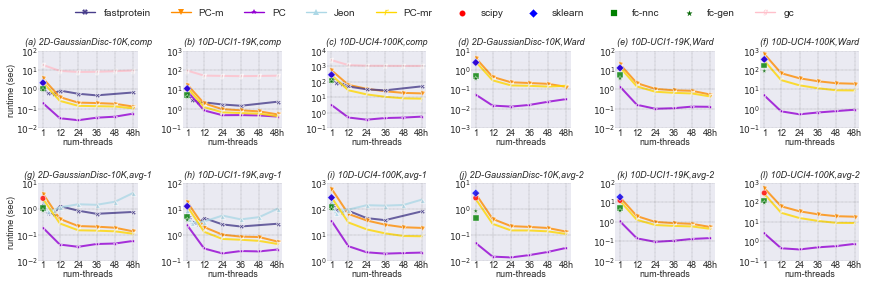

In [136]:
fig, axs = plt.subplots(2, 6, constrained_layout=False, figsize =(12,4))
for i in range(2):
    for j in range(6):
        myax = axs[i,j]
        accessIdx = i*6+j
        accessLetter = accessIdx#i*4+j
        plot_data = exps[accessIdx//3]
        plot_data_small = exps_small[accessIdx//3]
        dataset = datasets[accessIdx%3]
        method = methods[accessIdx//3]
#         if accessIdx >= 3:# or accessIdx == 8 or accessIdx == 11:
#             axs[i,j].axis("off")
#             continue
#         myax.plot(numCores, scalability, c=colors[memoGfkHdbLegend],
#                   linewidth=1,marker='s',label=memoGfkHdbLegend,
#                   markeredgewidth=1,markersize=4,mfc="None")
        sns.scatterplot(x = 'PlotThreads',
            y = 'Runtime',
            hue = 'Implementation',
            style = "Implementation",
            data = plot_data_small[plot_data_small["Dataset"] == dataset],
            ax = myax, markers=markers, palette=palette, alpha = 0.8, zorder=10) #
        sns.lineplot(x = 'PlotThreads',
                y = 'Runtime',
                hue = 'Implementation',
                style = "Implementation",
                data = plot_data[plot_data["Dataset"] == dataset],
                linewidth = 2,
                ax = myax, dashes=False, palette=palette, markers=markers, markersize = 5, alpha = 0.8, zorder=0) #,     
        myax.legend().set_visible(False)
        myax.set( yscale="log")
        if j==0:
            myax.set_ylabel("runtime (sec)", fontsize=9,labelpad=0)
        else:
            myax.set_ylabel("")
        myax.set_xlabel("num-threads", fontsize=9,labelpad=0)
        
        myax.set_title('(%s) %s,%s' % (letters[accessIdx], dataset, method),fontsize=9.0, fontstyle="italic")
        myax.grid(ls=':',linewidth=0.3,c='k')
        myax.set_xticks([1,12,24,36, 48,60])
        myax.set_xticklabels(["1","12","24", "36",  "48","48h"])
        myax.tick_params(pad = 0)
        for l in myax.yaxis.get_ticklabels():
            l.set_fontsize(9)
        for l in myax.xaxis.get_ticklabels():
            l.set_visible(True)
            l.set_fontsize(9)
        ylims = myax.get_ylim()
        
        ytoplog = np.ceil(np.log10(ylims[1]))
        ybottomlog = np.floor(np.log10(ylims[0]))
        myax.set_ylim((np.power(10, ybottomlog), np.power(10, ytoplog)))
        yticks = np.arange(ybottomlog, ytoplog+(ytoplog-ybottomlog)/5, 1)
        myax.set_yticks(np.power(10, yticks))
#         myax.set_yticklabels(["{0:0.2f}".format(i) for i in np.power(10, yticks)])
        myax.set_yticklabels(["$10^{%s}$" % int(i) for i in yticks]) #("{0:+0.1f}".format(i))

handles, labels = axs[1,0].get_legend_handles_labels()
handles2, labels2 = axs[0,0].get_legend_handles_labels()

handles.append(handles2[4])
labels.append(labels2[4])
# del handles[5]
# del labels[5]
# for i in range(2):
#     for j in range(6):
#         handles2, labels2 = axs[i,j].get_legend_handles_labels()
#         handles += handles2
#         labels += labels2
# handles, labels = reorderLegend(handles, labels)

plt.subplots_adjust(left=0.045,right=0.995,bottom=0.1,top=0.83,wspace=0.45,hspace=0.7)
fig.legend(handles, labels, loc='upper center', ncol=10,fontsize=10)
plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/revision/figures/exp1.pdf", bbox_inches = 'tight', pad_inches = 0.1)

In [51]:
def getRuntime(exp, dataset, implementation, thread=1):
    try:
        return float(exp[(exp["Dataset"] == dataset) & (exp["Implementation"] == implementation) & (exp["Threads"] == thread)]["Runtime"])
    except:
        return 1000000000000
    
def getCompareTable(exp, method):
    datasets = ["2D-UniformFill-1M", "2D-GaussianDisc-1M", "5D-UniformFill-1M", "5D-GaussianDisc-1M", "HT", "2D-UniformFill-10M", "2D-GaussianDisc-10M", "5D-UniformFill-10M", "5D-GaussianDisc-10M", "CHEM", "3D-GeoLife-24M"]
    times= [datasets, ["fastcluster (s)"],["PC-1 (s)"],["PC-48th (s)"]]
    for dataset in datasets:
        times[1].append(getRuntime(exp, dataset, "fastcluster"))
        times[2].append(getRuntime(exp, dataset, "PC", 1))
#         time48 = getRuntime(exp, dataset, "pac", 48)
#         time72 = getRuntime(exp, dataset, "pac", 72)
        time96 = getRuntime(exp, dataset, "PC", 96)
#         times[3].append(min([time48, time72, time96]))
        times[3].append(time96)
    times[0] = [method] + datasets
    return pd.DataFrame(times)

In [42]:
print(getCompareTable(exp2, "comp").to_csv(sep=',', index=False, header=False))
print(getCompareTable(exp3, "Ward").to_csv(sep=',', index=False, header=False))
print(getCompareTable(exp4, "avg-1").to_csv(sep=',', index=False, header=False))
print(getCompareTable(exp5, "avg-2").to_csv(sep=',', index=False, header=False))

comp,2D-UniformFill-1M,2D-GaussianDisc-1M,5D-UniformFill-1M,5D-GaussianDisc-1M,HT,2D-UniformFill-10M,2D-GaussianDisc-10M,5D-UniformFill-10M,5D-GaussianDisc-10M,CHEM,3D-GeoLife-24M
fastcluster (s),1000000000000,1000000000000,1000000000000,1000000000000,1000000000000,1000000000000,1000000000000,1000000000000,1000000000000,1000000000000,1000000000000
PC-1 (s),47.208,50.473,2119.1,2282.0,56.795,677.88,609.08,53008.0,49052.0,4972.9,1948.9
PC-48th (s),1.34416,1.608,40.40484,46.73602,3.6827400000000003,19.00761,21.28811,977.4675,1038.82017,126.54426000000001,123.34383999999999

Ward,2D-UniformFill-1M,2D-GaussianDisc-1M,5D-UniformFill-1M,5D-GaussianDisc-1M,HT,2D-UniformFill-10M,2D-GaussianDisc-10M,5D-UniformFill-10M,5D-GaussianDisc-10M,CHEM,3D-GeoLife-24M
fastcluster (s),3537.113474,3845.036001,7284.111271,6676.754975,8760.038037999999,1000000000000,1000000000000,1000000000000,1000000000000,1000000000000,1000000000000
PC-1 (s),11.312999999999999,12.23,79.108,103.09,23.133000000000003,175.7,156

In [27]:
exp2

,Dataset,Method,Cost,Runtime,Threads,Implementation,Unnamed: 6,PlotThreads,Unnamed: 8,Cruntime
0,10D-UCI4-100K,complete-euclidean,428.013825,276.905179,1.0,scipy,NaN,1.0,NaN,280.642783
1,10D-UCI1-19K,complete-euclidean,539827.960500,10.842135,1.0,scipy,NaN,1.0,NaN,10.664154
2,2D-GaussianDisc-10K,complete-euclidean,166994.788400,2.186572,1.0,scipy,NaN,1.0,NaN,2.141169
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10D-UCI4-100K,complete-euclidean,428.013825,277.235067,1.0,sklearn,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
182,2D-GaussianDisc-10K,comp,166994.788400,0.260630,12.0,PC-matrix-r,0.28234,12.0,NaN,NaN
183,2D-GaussianDisc-10K,comp,166994.788400,0.145030,24.0,PC-matrix-r,0.16600,24.0,NaN,NaN
184,2D-GaussianDisc-10K,comp,166994.788400,0.138960,36.0,PC-matrix-r,0.16354,36.0,NaN,NaN
185,2D-GaussianDisc-10K,comp,166994.788400,0.133950,48.0,PC-matrix-r,0.21009,48.0,NaN,NaN


In [33]:
exp2[(exp2["Dataset"] == "10D-UCI4-100K") & (exp2["Implementation"] == "PC-matrix") & (exp2["Threads"] == 24.0)]["Runtime"]

Series([], Name: Runtime, dtype: float64)

In [152]:
getRuntime(exp4, "2D-GaussianDisc-10K", "PC-mr", 96.0)

0.11027

In [156]:
speedups = []
i = 1
for dataset in ["10D-UCI4-100K","10D-UCI1-19K","2D-GaussianDisc-10K"]:
    for exp in [exp2, exp3, exp4, exp5]:
        i = i+1
        for thread in [1.0, 12.0, 24.0, 36.0, 48.0, 96.0]:
            matrix_time = getRuntime(exp, dataset, "PC-mr", thread)
            matrix_r_time = getRuntime(exp, dataset, "PC", thread)   
            if(matrix_time == 1000000000000 or matrix_r_time == 1000000000000):
                print(dataset, thread, i)
                print(matrix_time, matrix_r_time)
            else:
                speedups.append(matrix_time/matrix_r_time)
                if(matrix_time/matrix_r_time <1):
                    print(dataset, thread, i, ":::")

In [157]:
np.average(speedups)

15.059569699796937

## Scalability - Cores

In [43]:
def getScalability(exp, dataset, impl):
    runtime1 = getRuntime(exp, dataset, impl, 1)
#     time48 = getRuntime(exp, dataset, impl, 48)
#     time72 = getRuntime(exp, dataset, impl, 72)
    time96 = getRuntime(exp, dataset, impl, 96)
#     time48h = min([time48, time96])
    return runtime1 / time96

In [44]:

"""
get the scalability of all four linkage for the given implementation
"""
def getScalabiltyCore(impl, datasets):
    scal = {0:{"Dataset":"comp"}, 
           1:{"Dataset":"ward"}, 
           2:{"Dataset":"avg-1"}, 
           3:{"Dataset":"avg-2"}}
    exps=[exp2, exp3, exp4, exp5]
    for method in scal.keys():
        exp = exps[method]
        for dataset in datasets:
            scal[method][dataset] = getScalability(exp, dataset, impl)
    return pd.DataFrame(scal).transpose()

def getScalabiltyCorePlot(impl, datasets):
    methods = ["comp", "ward", "avg", "avg-sq"]
    scal = []
    exps=[exp2, exp3, exp4, exp5]
    for i in range(4):
        exp = exps[i]
        method = methods[i]
        for dataset in datasets:
            val = getScalability(exp, dataset, impl)
            if val > 100:
                val = 0
            scal.append([method, dataset,val])
    return pd.DataFrame(scal, columns=["Method", "Dataset", "Scalability"])

"""
get the scalability of average linkage for all three matrix based parallel methods
"""
def getScalabiltyCoreAvg( datasets):
    scal = {0:{"Impl":"PC-matrix"}, 
           1:{"Impl":"fastprotein"}, 
           2:{"Impl":"Jeon"}}
    exp = exp4
    for i in range(3):
        impl = scal[i]["Impl"]
        for dataset in datasets:
            scal[i][dataset] = getScalability(exp, dataset, impl)
    return pd.DataFrame(scal).transpose()

In [75]:
# datasets = ["10D-UCI4-100K","10D-UCI1-19K","2D-GaussianDisc-10K"]
# getScalabiltyCore("us-matrix", datasets)
# getScalabiltyCore("fastprotein", datasets)
# getScalabiltyCoreAvg( datasets)

In [240]:
# datasets = ['2D-GaussianDisc-10K', '10D-UCI1-19K',  '10D-UCI4-100K',\
#        '2D-UniformFill-1M', '2D-VisualVar-1M', '5D-UniformFill-1M',\
#        '5D-VisualVar-1M', '2D-UniformFill-10M', '2D-VisualVar-10M',\
#        '5D-UniformFill-10M', '5D-VisualVar-10M', '3D-GeoLife-24M',\
#        '10D-HT-0.94M', 'Household', 'CHEM']
# otf_scal_df = getScalabiltyCorePlot("us-otf", datasets)

In [49]:
# sns.set(style="whitegrid", font_scale=1.5) 
# fig, ax = plt.subplots(nrows = 1, figsize=(18,6), sharex = True)
# # ax1.set( yscale="log")
# # ax2.set( yscale="log")

# ax.set_ylim((1, 60))
# sns.barplot(x = 'Dataset',
#             y = 'Scalability',
#             hue = 'Method',
#             data = otf_scal_df,
#             ax = ax)#, palette=palette
# for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=-20, ha='left')

In [215]:
def getSpeedupTable(expnum):
    exclude_datasets= """and Dataset not in ("10D-UCI4-100K","10D-UCI1-19K","2D-GaussianDisc-10K", "2D-GaussianDisc-5M", "2D-GaussianDisc-100K")"""    
    exp_us =  sqldf("""select Dataset, Runtime, PlotThreads, Method from exp%s where Implementation='PC' """ % expnum +  exclude_datasets)
    exp_joined = sqldf("""select Dataset, Runtime as Runtime1 from exp%s where Threads=1 and Implementation='PC' """ % expnum + exclude_datasets ).join(exp_us.set_index('Dataset'), on='Dataset')
    exp_speedup = sqldf("""select Dataset, Runtime, Runtime1, PlotThreads, Runtime1/Runtime as Speedup, Method from exp_joined """ ).fillna(1)
    return exp_speedup.replace({"HT"}, {"10D-HT-0.94M"}).replace({"CHEM"}, {"16D-CHEM-4.2M"})

In [216]:
exp_speedup2 = getSpeedupTable(2)
exp_speedup3 = getSpeedupTable(3)
exp_speedup4 = getSpeedupTable(4)
exp_speedup4 = sqldf("""select * from exp_speedup4 where Dataset not in ("2D-UniformFill-10M","2D-GaussianDisc-10M", "5D-UniformFill-10M", "5D-GaussianDisc-10M", "16D-CHEM-4.2M", "3D-GeoLife-24M")""")
exp_speedup5 = getSpeedupTable(5)

In [217]:
paletted

{'2D-UniformFill-1M': (0.16470588235294117, 0.0, 0.8352941176470589),
 '2D-GaussianDisc-1M': (0.32941176470588235, 0.0, 0.6705882352941177),
 '5D-UniformFill-1M': (0.5019607843137255, 0.0, 0.4980392156862745),
 '5D-GaussianDisc-1M': (0.6666666666666666, 0.0, 0.33333333333333337),
 '2D-UniformFill-10M': (0.8313725490196078, 0.0, 0.16862745098039222),
 '2D-GaussianDisc-10M': (0.996078431372549, 0.00392156862745098, 0.0),
 '5D-UniformFill-10M': (0.8313725490196078, 0.16862745098039217, 0.0),
 '5D-GaussianDisc-10M': (0.6666666666666667, 0.3333333333333333, 0.0),
 '3D-GeoLife-24M': (0.49411764705882355, 0.5058823529411764, 0.0),
 '10D-HT-0.94M': (0.3294117647058824, 0.6705882352941176, 0.0),
 '16D-CHEM-4.2M': (0.16470588235294115, 0.8352941176470589, 0.0)}

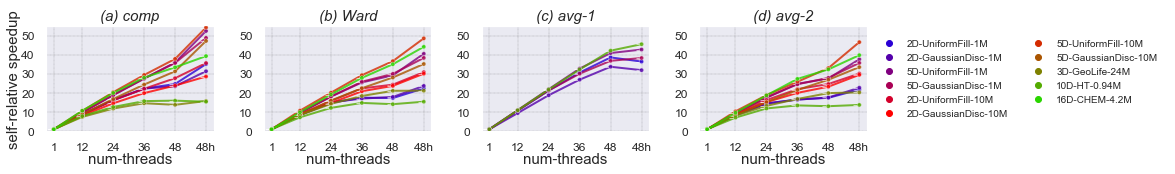

In [220]:
dataset_colors = sns.color_palette('brg', 11)
paletted={}
i=0
for data in [
 '2D-UniformFill-1M',\
 '2D-GaussianDisc-1M',\
 '5D-UniformFill-1M',\
 '5D-GaussianDisc-1M',\
 '2D-UniformFill-10M',\
 '2D-GaussianDisc-10M',\
 '5D-UniformFill-10M',\
 '5D-GaussianDisc-10M',\
 '3D-GeoLife-24M',\
 "10D-HT-0.94M", "16D-CHEM-4.2M"]:
    paletted[data] = dataset_colors[i]
    i=i+1
letters = ["a", "b", "c","d"]
datasets= [dataset]
exps=[exp_speedup2, exp_speedup3, exp_speedup4, exp_speedup5] 
# exps_small=[exp2_small_scatter, exp3_small_scatter, exp4_small_scatter, exp5_small_scatter] 
methods = ["comp", "Ward", "avg-1", "avg-2"]

fig, axs = plt.subplots(1, 4, constrained_layout=False, figsize =(12,2))
for i in range(1):
    for j in range(4):
        myax = axs[j]
        accessIdx = j
        accessLetter = accessIdx#i*4+j
        plot_data = exps[accessIdx]
#         plot_data_small = exps_small[accessIdx]
        dataset = datasets[0]
        method = methods[accessIdx]
        sns.scatterplot(x = 'PlotThreads',
            y = 'Speedup',
            hue = 'Dataset',
            data = exps[j],
            ax = myax, marker = 'o', palette=paletted, size = 5, alpha = 0.8, zorder=10) #
        sns.lineplot(x = 'PlotThreads',
                y = 'Speedup',
                hue = 'Dataset',
                style = 'Dataset',
                data = exps[j], #[exps[j]["Dataset"]!= "5D-UniformFill-10M"],
                linewidth = 2,
                ax = myax, marker =False, dashes=False, alpha = 0.8, palette=paletted) #,     
        myax.legend().set_visible(False)
#         myax.set( yscale="log")
        if j==0:
            myax.set_ylabel("self-relative speedup", fontsize=15,labelpad=0)
        else:
            myax.set_ylabel("")
        myax.set_xlabel("num-threads", fontsize=15,labelpad=0)
        
        myax.set_title('(%s) %s' % (letters[accessIdx], method),fontsize=15.0, fontstyle="italic")
        myax.grid(ls=':',linewidth=0.3,c='k')
        myax.set_xticks([1,12,24, 36, 48,60])
        myax.set_xticklabels(["1","12","24", "36","48","48h"])

        for l in myax.xaxis.get_ticklabels():
            l.set_visible(True)
            l.set_fontsize(12)
#         ylims = myax.get_ylim()
        myax.set_ylim((0, 55))
#         ytoplog = np.ceil(np.log10(ylims[1]))
#         ybottomlog = np.floor(np.log10(ylims[0]))
#         myax.set_ylim((np.power(10, ybottomlog), np.power(10, ytoplog)))
        yticks = np.arange(0,55,10)
        myax.set_yticks(yticks)
# #         myax.set_yticklabels(["{0:0.2f}".format(i) for i in np.power(10, yticks)])
#         myax.set_yticklabels(["$10^{%s}$" % ("{0:+0.1f}".format(i)) for i in yticks])
        for l in myax.yaxis.get_ticklabels():
            l.set_fontsize(12)
handles, labels = axs[0].get_legend_handles_labels()
# labels[-1] = "10D-HT-0.94M"

plt.subplots_adjust(left=0.045,right=0.995,bottom=0.1,top=0.83,wspace=0.3,hspace=0.7)
fig.legend(handles[11:-1], labels[11:-1], bbox_to_anchor=([1.35, 1]), ncol=2,fontsize=10)
plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/figures/exp_scal.pdf", bbox_inches = 'tight', pad_inches = 0.1)

## Scalability with Data

In [49]:
def scalabilityData(datasets):
    
    sizes = [10000, 100000, 1000000,10000000]
    methods = ["complete", "ward", "avg-1", "avg-2"]
    table= []
    exps = [exp2, exp3, exp4, exp5]
    for j in range(len(datasets)):
        dataset = datasets[j]
        row = [dataset]
        for i in range(4):
            time = getRuntime(exps[i], dataset, "PC", 96)
            if time > 1000000:
                time = 0
            row.append(time)
        row.append(sizes[j])
        table.append(row)
    return pd.DataFrame(table, columns =["datasets", "comp", "Ward", "avg-1", "avg-2", "datasize"])
    

In [52]:
datasets = ["2D-GaussianDisc-10K", "2D-GaussianDisc-100K", "2D-GaussianDisc-1M","2D-GaussianDisc-10M"]
expscal1 =  scalabilityData(datasets)

In [53]:
datasets = ["2D-UniformFill-10K", "2D-UniformFill-100K", "2D-UniformFill-1M","2D-UniformFill-10M"]
expscal2 =  scalabilityData(datasets)

In [64]:
datasets = ["3D-GeoLife-10K", "3D-GeoLife-100K", "3D-GeoLife-1M","3D-GeoLife-10M"]
expscal3 =  scalabilityData(datasets)

In [65]:
print(expscal1.to_csv(sep=',', index=False))
print(expscal2.to_csv(sep=',', index=False))
print(expscal3.to_csv(sep=',', index=False))

datasets,comp,Ward,avg-1,avg-2,datasize
2D-GaussianDisc-10K,0.05779,0.032080000000000004,0.05848,0.03141,10000
2D-GaussianDisc-100K,0.22013000000000002,0.10159,0.27654,0.09815,100000
2D-GaussianDisc-1M,1.608,0.51598,26.829109999999996,0.48788000000000004,1000000
2D-GaussianDisc-10M,21.28811,5.19931,3206.48125,4.79875,10000000

datasets,comp,Ward,avg-1,avg-2,datasize
2D-UniformFill-10K,0.041069999999999995,0.026310000000000004,0.04817,0.01913,10000
2D-UniformFill-100K,0.15247,0.07672000000000001,0.40329,0.07617,100000
2D-UniformFill-1M,1.34416,0.5045,23.58896,0.47200000000000003,1000000
2D-UniformFill-10M,19.00761,5.686,2969.93047,5.2969599999999994,10000000

datasets,comp,Ward,avg-1,avg-2,datasize
3D-GeoLife-10K,0.09495,0.05112,0.1264,0.06673,10000
3D-GeoLife-100K,0.5938399999999999,0.22943000000000002,0.78466,0.27532,100000
3D-GeoLife-1M,4.02234,1.0532,29.83428,1.1914799999999999,1000000
3D-GeoLife-10M,53.46083,12.28045,2916.99212,11.11173,10000000



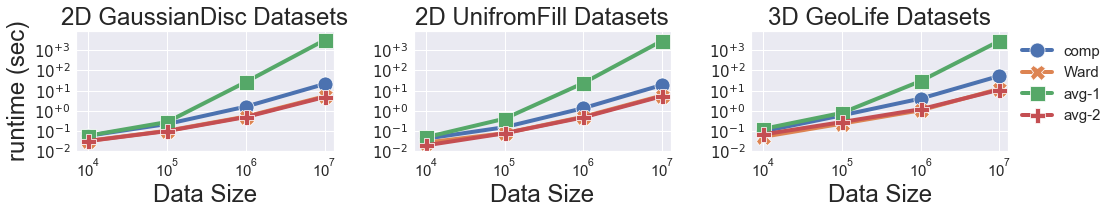

In [74]:
def PlotDataScalability():
    sns.set(font_scale=2) 
    fig, axs = plt.subplots(1, 3, figsize =(16,4))
    markers = ['o','X','s','P']
    i=0
    for method in ["comp", "Ward", "avg-1", "avg-2"]:
        sns.lineplot(x = 'datasize',
                    y = method,
                    data = expscal1,
                    linewidth = 4,
                    ax = axs[0], dashes=False,  marker=markers[i], markersize=15, label=method) #, palette=palette
        sns.lineplot(x = 'datasize',
                    y = method,
                    data = expscal2,
                    linewidth = 4,
                    ax = axs[1], dashes=False,  marker=markers[i], markersize=15, label=method) 
        sns.lineplot(x = 'datasize',
                    y = method,
                    data = expscal3,
                    linewidth = 4,
                    ax = axs[2], dashes=False,  marker=markers[i], markersize=15, label=method) 
        i=i+1
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=25)

        ax.tick_params(pad = 0)
        for l in ax.yaxis.get_ticklabels():
            l.set_fontsize(15)
        for l in ax.xaxis.get_ticklabels():
            l.set_fontsize(15)
        
        
        ax.set_xlabel("Data Size")
        ax.set_yscale("log")
        ax.set_xscale("log")
        ax.set_xlim( (1e4*0.7,1e7*1.3))
        ax.set_xticks([1e4, 1e5, 1e6, 1e7])
        yticks = [ 0.01, 0.1,1, 10, 100, 1e3]
        ax.set_yticks(yticks)
        ax.set_yticklabels(["$10^{%s}$" % ("{0:+0.0f}".format(i)) for i in np.log10(yticks)])
        ax.set_ylim( (0.01,9000))
        
    axs[0].set_ylabel("runtime (sec)")
    axs[1].set_ylabel("")
    axs[2].set_ylabel("")
    axs[0].set_title("2D GaussianDisc Datasets")
    axs[1].set_title("2D UnifromFill Datasets")
    axs[2].set_title("3D GeoLife Datasets")
    axs[2].legend( bbox_to_anchor=([1, 1]),fontsize=15)
    axs[0].legend().set_visible(False)
    axs[1].legend().set_visible(False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.7)

    plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/revision/figures/exp_scal_data.pdf", bbox_inches = 'tight', pad_inches = 0.1)

PlotDataScalability()

In [75]:
# def PlotDataScalability():
#     sns.set(font_scale=1.6) 
#     fig, ax = plt.subplots(figsize=(8,4))
#     markers = ['o','X','s','P']
#     i=0
#     for method in ["comp", "Ward", "avg-1", "avg-2"]:
#         sns.lineplot(x = 'datasize',
#                     y = method,
#                     data = expscal,
#                     linewidth = 4,
#                     ax = ax, dashes=False,  marker=markers[i], markersize=15, label=method) #, palette=palette
#         i=i+1
#     ax.tick_params(axis='both', which='major', labelsize=25)

#     ax.tick_params(pad = 0)
#     for l in ax.yaxis.get_ticklabels():
#         l.set_fontsize(15)
#     for l in ax.xaxis.get_ticklabels():
#         l.set_fontsize(15)
#     ax.set_title("2D GaussianDisc Datasets")
#     ax.set_ylabel("runtime (sec)")
#     ax.set_xlabel("Data Size")
#     ax.set_yscale("log")
#     ax.set_xscale("log")
#     ax.set_xlim( (1e4*0.7,1e7*1.3))
#     ax.set_xticks([1e4, 1e5, 1e6, 1e7])
#     yticks = [ 0.01, 0.1,1, 10, 100, 1e3]
#     ax.set_yticks(yticks)
#     ax.set_yticklabels(["$10^{%s}$" % ("{0:+0.0f}".format(i)) for i in np.log10(yticks)])
#     ax.set_ylim( (0.01,9000))

#     ax.legend( bbox_to_anchor=([1, 1]),fontsize=15)
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.7)

#     plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/figures/revision/exp_scal_data.pdf", bbox_inches = 'tight', pad_inches = 0.1)

# PlotDataScalability()


## Round time

In [76]:
sns.set(font_scale=1.6) #style="whitegrid", 
round_split = re.compile("\n\n")#("(### Batch [0-9]+)")
space_split = re.compile("( |\n)")#("(### Batch [0-9]+)")
run_split = re.compile("\+\+\+\+\+\+\+\+\+\+\+\+\+\+\+\n")

time_find = re.compile("::CLINK:.+?\n")


# merge_find = re.compile(":::::merge:.+?\n")
# alloc_find = re.compile(":::::alloc new table:.+?\n")
# update_dist_find = re.compile(":::::update dist:.+?\n")
# delete_find = re.compile(":::::delete old table:.+?\n")

init_find = re.compile("::initialize:.+?\n")
nn_find = re.compile("::find-nn:.+?\n")
update_cluster_find = re.compile("::update-clusters:.+?\n")
update_cache_find = re.compile("::link-update:.+?\n")

sub_lst = ['nn', 'merge',  'update']
f_lst = [nn_find, update_cache_find, update_cluster_find]



def get_sub_time(rd, f):
    match = f.findall(rd+"\n")
    if match:      
        return float(space_split.split(match[0])[-3])
    else:
        return 0

def get_round_times(file, thread):
    f1 = open(file)  
    data1 = f1.read()
    num_runs = 3
    if thread == 1:
        num_runs = 1
    
    runs = run_split.split(data1) #runs[1:1+num_runs] are the three runs
    runtimes = []
    for i in range(num_runs):
        runtimes.append(float(time_find.findall(runs[1+i]+"\n")[0][9:]))
    min_round = np.argmin(runtimes)
    
    rounds = round_split.split(runs[1+min_round])
    times = {}
    for i in range(len(sub_lst)):
        times[sub_lst[i]] = []
        
    
    for i in range(1,len(rounds)):
        for j in range(len(sub_lst)):
            times[sub_lst[j]].append(get_sub_time(rounds[i], f_lst[j]))
    
    times["init"] = [float(init_find.findall(runs[1+min_round]+"\n")[0][14:])]
    
    return times

In [105]:
def data_plot_round_times(datasets, thread, use_index = False):
    data = {'datasize': [10000, 100000, 1000000, 10000000],
        'init': [],
        'nn': [],
     'merge': [],
     'update': [],}
    method_folder = "avg32"
    
    for dataset in datasets:
        
        total = 0
        times = get_round_times("/Users/sy/Desktop/MIT/HAC/parChain/outputs/outputs_%s/%s_%s_%sth.txt" % (method_folder,method_folder, dataset, thread), thread)
        for key in times:
            t = sum(times[key])
            data[key].append(t)
            total = total+t
#         for key in times:
#             data[key][-1] = data[key][-1]/total

    df = pd.DataFrame(data, index=datasets)
    return df

In [173]:
def data_plot_round_times_threads(dataset, threads, use_index = False):
    data = {'threads': [1, 12, 24, 36, 48, 60],
        'init': [],
        'nn': [],
     'merge': [],
     'update': [],}
    method_folder = "avg32"
    
    for thread in threads:
        
        total = 0
        times = get_round_times("/Users/sy/Desktop/MIT/HDBSCAN/pbbs/linkage/outputs_%s/%s_%s_%sth.txt" % (method_folder,method_folder, dataset, thread), thread)
        for key in times:
            t = sum(times[key])
            data[key].append(t)
            total = total+t
#         for key in times:
#             data[key][-1] = data[key][-1]/total

    df = pd.DataFrame(data, index=[1, 12, 24, 36, 48, 60]
                     )
    return df

In [185]:
def plot_round_times():
    sns.set(font_scale=2) 
    fig, axs = plt.subplots(1, 3, figsize =(16,4))
    markers = ['o','X','s','P']
    i=0
    data1 = data_plot_round_times(["2D_GaussianDisc_10K", "2D_GaussianDisc_100K", "2D_GaussianDisc_1M","2D_GaussianDisc_10M"],  96)
    data2 = data_plot_round_times(["2D_UniformFill_10K", "2D_UniformFill_100K", "2D_UniformFill_1M","2D_UniformFill_10M"], 96)
    data3 = data_plot_round_times(["3D_GeoLife_10K", "3D_GeoLife_100K", "3D_GeoLife_1M","3D_GeoLife_10M"],96)
    for step in ["init", "nn", "merge", "update"]:
        sns.lineplot(x = 'datasize',
                    y = step,
                    data = data1,
                    linewidth = 4,
                    ax = axs[0], dashes=False,  marker=markers[i], markersize=15, label=step) #, palette=palette
        sns.lineplot(x = 'datasize',
                    y = step,
                    data = data2,
                    linewidth = 4,
                    ax = axs[1], dashes=False,  marker=markers[i], markersize=15, label=step) 
        sns.lineplot(x = 'datasize',
                    y = step,
                    data = data3,
                    linewidth = 4,
                    ax = axs[2], dashes=False,  marker=markers[i], markersize=15, label=step) 
        i=i+1
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=25)

        ax.tick_params(pad = 0)
        for l in ax.yaxis.get_ticklabels():
            l.set_fontsize(15)
        for l in ax.xaxis.get_ticklabels():
            l.set_fontsize(15)
        
        
        ax.set_xlabel("Data Size")
        ax.set_yscale("log")
        ax.set_xscale("log")
        ax.set_xlim( (1e4*0.7,1e7*1.3))
        ax.set_xticks([1e4, 1e5, 1e6, 1e7])
        yticks = [0.001, 0.01,  0.1, 1, 10, 1e2, 1e3]
        ax.set_yticks(yticks)
        ax.set_yticklabels(["$10^{%s}$" % ("{0:+0.0f}".format(i)) for i in np.log10(yticks)])
        ax.set_ylim( (0.001,9000))
        
    axs[0].set_ylabel("runtime (sec)")
    axs[1].set_ylabel("")
    axs[2].set_ylabel("")
    axs[0].set_title("2D GaussianDisc Datasets")
    axs[1].set_title("2D UnifromFill Datasets")
    axs[2].set_title("3D GeoLife Datasets")
    axs[2].legend( bbox_to_anchor=([1, 1]),fontsize=15)
    axs[0].legend().set_visible(False)
    axs[1].legend().set_visible(False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.7)
    plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/revision/figures/decomp_new.pdf", bbox_inches = 'tight', pad_inches = 0.1)

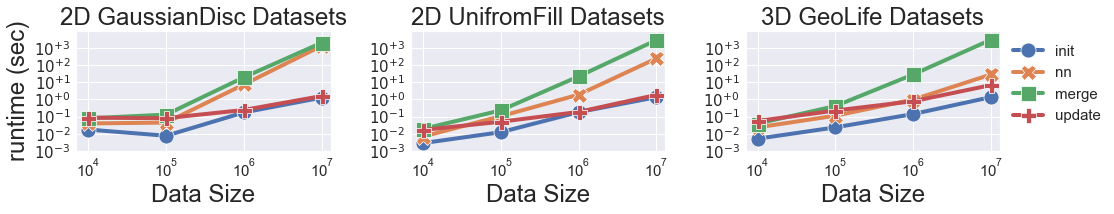

In [186]:
plot_round_times()

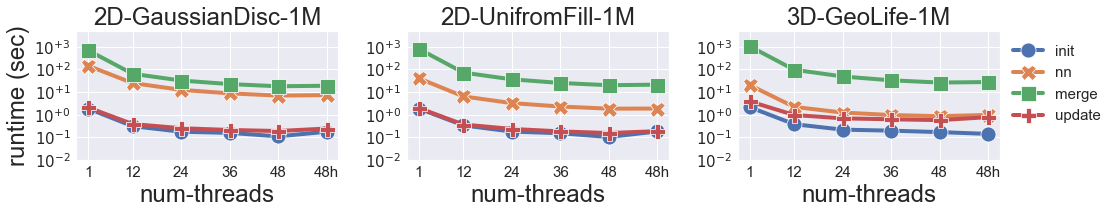

In [188]:
def plot_round_times_thread():
    sns.set(font_scale=2) 
    fig, axs = plt.subplots(1, 3, figsize =(16,4))
    markers = ['o','X','s','P']
    i=0
    data1 = data_plot_round_times_threads("2D_GaussianDisc_1M", [1, 12, 24, 36, 48, 96])
    data2 = data_plot_round_times_threads("2D_UniformFill_1M", [1, 12, 24, 36, 48, 96])
    data3 = data_plot_round_times_threads("3D_GeoLife_1M", [1, 12, 24, 36, 48, 96])
    for step in ["init", "nn", "merge", "update"]:
        sns.lineplot(x = 'threads',
                    y = step,
                    data = data1,
                    linewidth = 4,
                    ax = axs[0], dashes=False,  marker=markers[i], markersize=15, label=step) #, palette=palette
        sns.lineplot(x = 'threads',
                    y = step,
                    data = data2,
                    linewidth = 4,
                    ax = axs[1], dashes=False,  marker=markers[i], markersize=15, label=step) 
        sns.lineplot(x = 'threads',
                    y = step,
                    data = data3,
                    linewidth = 4,
                    ax = axs[2], dashes=False,  marker=markers[i], markersize=15, label=step) 
        i=i+1
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=25)

        ax.tick_params(pad = 0)
        for l in ax.yaxis.get_ticklabels():
            l.set_fontsize(15)
        for l in ax.xaxis.get_ticklabels():
            l.set_fontsize(15)
        
        
        ax.set_xlabel("num-threads")
        ax.set_yscale("log")
#         ax.set_xscale("log")
#         ax.set_xlim( (1e4*0.7,1e7*1.3))
        ax.set_xticks([1,12,24,36, 48,60])
        ax.set_xticklabels(["1","12","24", "36",  "48","48h"])
        yticks = [0.01,  0.1, 1, 10, 1e2, 1e3]
        ax.set_yticks(yticks)
        ax.set_yticklabels(["$10^{%s}$" % ("{0:+0.0f}".format(i)) for i in np.log10(yticks)])
        ax.set_ylim( (0.01,5000))
        
    axs[0].set_ylabel("runtime (sec)")
    axs[1].set_ylabel("")
    axs[2].set_ylabel("")
    axs[0].set_title("2D-GaussianDisc-1M")
    axs[1].set_title("2D-UnifromFill-1M")
    axs[2].set_title("3D-GeoLife-1M")
    axs[2].legend( bbox_to_anchor=([1, 1]),fontsize=15)
    axs[0].legend().set_visible(False)
    axs[1].legend().set_visible(False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.7)
    plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/revision/figures/decomp_new_thread.pdf", bbox_inches = 'tight', pad_inches = 0.1)
    
plot_round_times_thread()

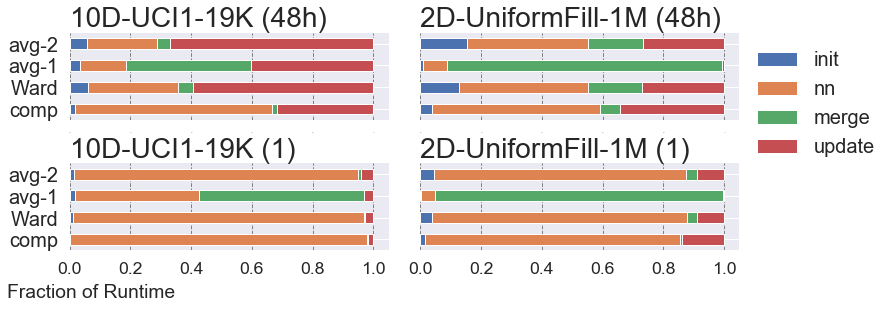

In [52]:
# def plot_round_times(dataset, ax, thread, use_index = False):
#     methods = ["comp", "Ward", "avg-1", "avg-2"]
#     method_folders = ["complete", "ward", "avg32", "avgsq"]
#     data = {'init': [],
#         'nn': [],
#      'merge': [],
#      'update': [],}
    
#     for i in range(4):
#         method_folder = method_folders[i]
#         total = 0
#         times = get_round_times("/Users/sy/Desktop/MIT/OPTICS/pbbs/linkage/outputs_%s/%s_%s_%sth.txt" % (method_folder,method_folder, dataset, thread), thread)
#         for key in times:
#             t = sum(times[key])
#             data[key].append(t)
#             total = total+t
#         for key in times:
#             data[key][-1] = data[key][-1]/total

#     df = pd.DataFrame(data, index=methods)
# #     print(df)
#     if not use_index:
#         df = pd.DataFrame(data, index=["","","",""])
#     ax = df.plot.barh(stacked=True, ax = ax)
#     # title, legend, labels
#     thread_txt = thread
#     if thread == 96:
#         thread_txt = dataset.replace("_","-") + (" (48h)" )
#     else:
#         thread_txt = dataset.replace("_","-") + (" (1)" )                            
# #         dataset.replace("_","-") + (" (%s)" % thread_txt
#     ax.set_title(thread_txt, loc='left', fontsize=28)
    
# #     ax.set_xscale('log')

#     # remove spines
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)

#     # adjust limits and draw grid lines
#     plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
#     if thread == 96:
#         for l in ax.xaxis.get_ticklabels():
#             l.set_fontsize(0)
# #         ax.set_axisbelow(False)
# #     else:
#     ax.set_axisbelow(True)
#     ax.xaxis.grid(color='gray', linestyle='dashed')


# def plot_decomposition(datasets):
#     fontsize = 20
#     fig, axs = plt.subplots(2, 2, constrained_layout=False, figsize =(12,4))
#     plot_round_times(datasets[0], axs[0][0], 96, True)
#     plot_round_times(datasets[1], axs[0][1], 96)
#     plot_round_times(datasets[0], axs[1][0], 1, True)
#     plot_round_times(datasets[1], axs[1][1], 1)
#     axs[0][0].legend().set_visible(False)
#     axs[0][1].legend(bbox_to_anchor=([1, 1]), frameon=False, fontsize=fontsize)
#     axs[1][0].legend().set_visible(False)
#     axs[1][1].legend().set_visible(False)
#     # plt.xlabel('Percent of Runtime')
#     for l in axs[0][0].yaxis.get_ticklabels():
#         l.set_fontsize(fontsize)
#     for l in axs[1][0].yaxis.get_ticklabels():
#         l.set_fontsize(fontsize)
        
#     fig.text(0.15, -0.04, 'Fraction of Runtime', ha='center')
#     plt.subplots_adjust(wspace=0.1,hspace=0.5)
# #     fig.tight_layout()
# #     plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/figures/decomp0.pdf", bbox_inches = 'tight', pad_inches = 0.1)

# datasets = ["10D_UCI1_19K", "2D_UniformFill_1M"]
# plot_decomposition(datasets)

## No range

In [43]:
exp_no_range = pd.read_csv("runtimeProcessed/norange_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","PlotThreads"])
for i in [2,3,4,5]:
    exp_us = sqldf("""select * from exp%s where Threads=96 and Dataset in ("10D-UCI4-100K", "2D-UniformFill-1M") and Implementation="PC" """ % i)    
    exp_no_range = pd.concat([exp_no_range, exp_us])
exp_no_range = exp_no_range.replace(["average", "averagesq"], ["avg-1", "avg-2"])
exp_no_range = exp_no_range.replace(["PC", "PC-no-range"], ["ParChain", "ParChain-no-range"])

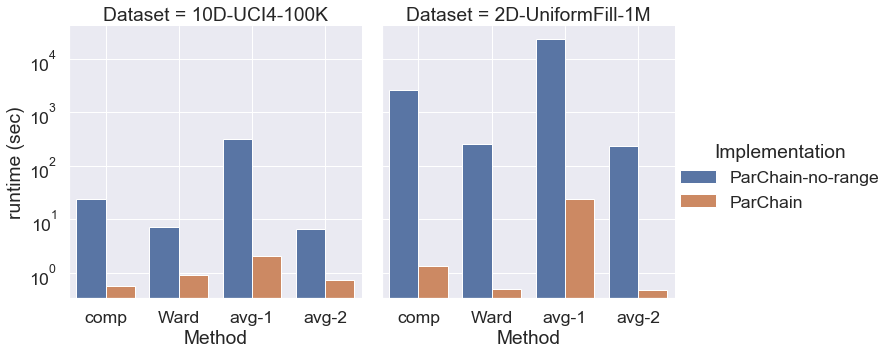

In [44]:
# fig, axs = plt.subplots(1, 2, constrained_layout=False, figsize =(12,4))
sns.set(font_scale=1.6)
g = sns.catplot(x="Method", y="Runtime", hue="Implementation", ci=None, data=exp_no_range, col = "Dataset", kind = "bar")
for ax in g.axes[0]:
    ax.set_yscale('log')
g.axes[0][0].set_ylabel("runtime (sec)")
#     for tick in ax.get_xticklabels():
#         tick.set_rotation(-10)
g.axes[0][0].grid(b=True, which='major', linestyle='-')
g.axes[0][1].grid(b=True, which='major', linestyle='-')

# L=g.legend
# L.get_texts()[0].set_text('ParChain-nr')
# L.get_texts()[1].set_text('ParChain')
# g._legend.set_bbox_to_anchor((0.98,0.5))

plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/revision/figures/norange.pdf", bbox_inches = 'tight', pad_inches = 0.1)

In [38]:
print(g._legend.get_bbox_to_anchor())

TransformedBbox(
    Bbox(x0=0.0, y0=0.0, x1=12.279305555555556, y1=5.0),
    Affine2D(
        [[72.  0.  0.]
         [ 0. 72.  0.]
         [ 0.  0.  1.]]))


## Cache Sizes

In [224]:
exp_memory = pd.read_csv("runtimeProcessed/memory_us.csv", index_col = False, 
                           names=["Dataset", "Method", "Implementation","Memory (MB)", "Filesize", "Datasize"])

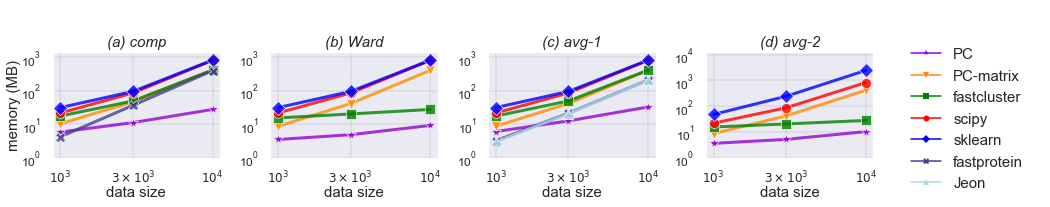

In [225]:
letters = ["a", "b", "c","d"]
methods = ["comp", "Ward", "avg-1", "avg-2"]

fig, axs = plt.subplots(1, 4, constrained_layout=False, figsize =(12,2))
for j in range(4):
    myax = axs[j]
    method = methods[j]
    plot_data = exp_memory[exp_memory["Method"]==method]

    sns.lineplot(x = "Datasize",
            y = "Memory (MB)",
            hue = "Implementation",
            style = "Implementation",
            data = plot_data,
            linewidth = 3,
            ax = myax, dashes=False, markers=markers, markersize = 10, alpha = 0.8, palette=palette) #,     
    myax.legend().set_visible(False)
#         myax.set( yscale="log")
    if j==0:
        myax.set_ylabel("memory (MB)", fontsize=15,labelpad=0)
    else:
        myax.set_ylabel("")
    myax.set_xlabel("data size", fontsize=15,labelpad=0)

    myax.set_title('(%s) %s' % (letters[j], method),fontsize=15.0, fontstyle="italic")
    myax.grid(ls=':',linewidth=0.3,c='k')
    
    myax.set_yscale('log')
    myax.set_xscale('log')
    myax.set_xticks([1e3,3000,1e4])
    myax.set_xticklabels([r'$10^{3}$', r'$3\times 10^{3}$', r'$10^{4}$'])

    for l in myax.xaxis.get_ticklabels():
        l.set_visible(True)
        l.set_fontsize(12)

    if (j < 3):
        myax.set_ylim((1, 1e3*1.4))
        yticks = np.arange(0,4)
        myax.set_yticks(np.power(10, yticks))
    else:
        myax.set_ylim((1, 1e4*1.2))
        yticks = np.arange(0,5)
        myax.set_yticks(np.power(10, yticks))
                      
#     myax.set_ylim((1,10000))
#     myax.set_xlim(((1e3)*0.8,(1e6)*1.2))
#     yticks = np.arange(1,5)
#     myax.set_yticks(np.power(10, yticks))
#     myax.set_yticklabels([r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'])
    for l in myax.yaxis.get_ticklabels():
        l.set_fontsize(12)
handles, labels = axs[2].get_legend_handles_labels()


plt.subplots_adjust(left=0.045,right=0.995,bottom=0.1,top=0.83,wspace=0.3,hspace=0.7)
fig.legend(handles, labels, bbox_to_anchor=([1.2, 1.2]), ncol=1,fontsize=15)
plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/figures/memory.pdf", bbox_inches = 'tight', pad_inches = 0.1)

In [114]:
exp128=pd.read_csv("runtimeProcessed/avg128_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime","PlotThreads"])
exp64=pd.read_csv("runtimeProcessed/avg64_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime""PlotThreads"])
# exp256=pd.read_csv("runtimeProcessed/avg256_times_us.csv", index_col = False, 
#                            names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime","PlotThreads"])
exp32=pd.read_csv("runtimeProcessed/avg32_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime","PlotThreads"])
exp16=pd.read_csv("runtimeProcessed/avg16_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime","PlotThreads"])

exp8=pd.read_csv("runtimeProcessed/avg8_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime","PlotThreads"])

exp4=pd.read_csv("runtimeProcessed/avg4_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime","PlotThreads"])

exp2=pd.read_csv("runtimeProcessed/avg2_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime","PlotThreads"])

exp0=pd.read_csv("runtimeProcessed/avg1_times_us.csv", index_col = False, 
                           names=["Dataset", "Method","Cost","Runtime","Threads","Implementation","maxtime","PlotThreads"])

cache_exps = [exp0, exp2, exp4, exp8, exp16, exp32, exp64, exp128]
cache_sizes= [0, 4,8,16,32, 64, 128, 256]

exp_cache = cache_exps[0]
for i in range(1, len(cache_exps)):
    exp_cache = pd.concat([exp_cache, cache_exps[i]])
exp_cache = exp_cache.replace([" ", "avg-1"],[0, "avg32"])

In [115]:
exclude_datasets= """and Dataset not in ("2D-GaussianDisc-5M", "2D-GaussianDisc-10M", "2D-GaussianDisc-100K")"""    
# small_datasets= """Dataset in ("2D-GaussianDisc-10K", "10D-UCI1-19K", "10D-UCI4-100K")""" 
large_datasets= """Dataset in ("2D-UniformFill-1M", "2D-GaussianDisc-1M", "5D-GaussianDisc-1M", "HT")"""  

exp_cache_plot = sqldf("""select Dataset, Method, Runtime from exp_cache where Runtime != 0 and Threads=96 """ + exclude_datasets)
exp_cache_plot["Runtime"] = pd.to_numeric(exp_cache_plot["Runtime"])
exp_cache_plot_large = sqldf("""select * from exp_cache_plot where """ + large_datasets)


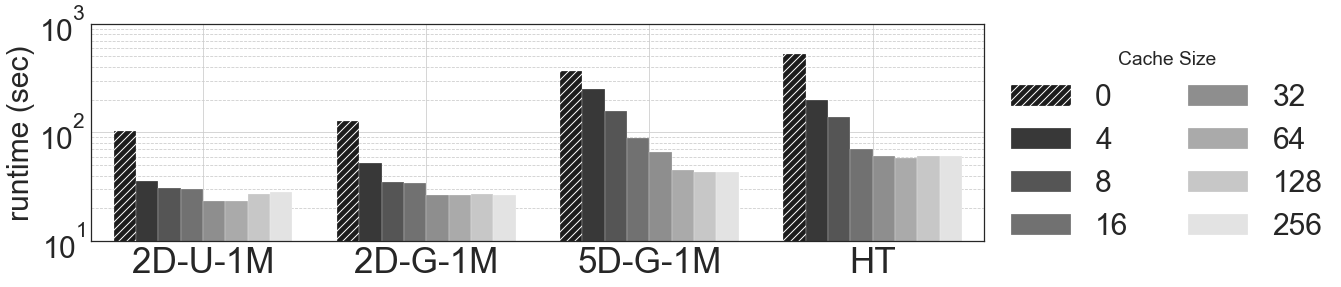

In [116]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
fig, ax = plt.subplots(1, 1, figsize =(16,4))
# fig.subplots_adjust(hspace=0.2)  # adjust space between axes
fontsize = 35

my_pa = sns.color_palette("gist_gray", 8)
sns.barplot(x="Dataset", y="Runtime", ci=None, hue="Method", data=exp_cache_plot_large, palette=my_pa)


ax.set_xticklabels(["2D-U-1M","2D-G-1M","5D-G-1M","HT"])
ax.set_yscale("log")
ax.set_yticks(np.power(10, [1,2,3]))

for l in ax.xaxis.get_ticklabels():
    l.set_visible(True)
    l.set_fontsize(fontsize)
for l in ax.yaxis.get_ticklabels():
    l.set_fontsize(fontsize-5)

for i in range(4):
    ax.patches[i].set_hatch('///')

handles, labels = ax.get_legend_handles_labels()


ax.legend(handles, cache_sizes, bbox_to_anchor=([1, 1]), fontsize=fontsize-5, title = "Cache Size", ncol = 2)
ax.set_ylabel("runtime (sec)", fontsize = fontsize-5)
ax.set_xlabel("")

ax.grid(b=True, which='major', linestyle='-')
ax.grid(b=True, which='minor', linestyle='--')


plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/revision/figures/cachesize.pdf", bbox_inches = 'tight', pad_inches = 0.1)

# # of rounds and terminal nodes

In [5]:
round_split = re.compile("\n\n")#("(### Batch [0-9]+)")
space_split = re.compile("( |\n)")#("(### Batch [0-9]+)")
run_split = re.compile("\+\+\+\+\+\+\+\+\+\+\+\+\+\+\+\n")

round_find = re.compile("rounds = .+?\n")
chain_num_find = re.compile("\[Chain\] # =.+?\n")


def get_round_numbers(file):
    f1 = open(file)  
    data1 = f1.read()
    num_runs = 3
#     if thread == 1:
#         num_runs = 1
    
    runs = run_split.split(data1) #runs[1:1+num_runs] are the three runs
    round_num = int(round_find.findall(runs[1])[0][9:])

    rounds = round_split.split(runs[1])
    terminal_nums = []
    
    for i in range(1,len(rounds)):
        terminal_nums.append(int(chain_num_find.findall(rounds[i])[0][12:]))
    return round_num, sum(terminal_nums)

In [9]:
## scatter plots 
datasets = [    "10D_UCI4_100K" ,\
        "10D_UCI1_19K" ,\
        "2D_GaussianDisc_10K",\
        "2D_UniformFill_1M",\
        "2D_GaussianDisc_1M",\
        "5D_UniformFill_1M",\
        "5D_GaussianDisc_1M",\
        "2D_UniformFill_10M",\
        "2D_GaussianDisc_10M",\
        "5D_UniformFill_10M",\
        "5D_GaussianDisc_10M",\
        "3D_GeoLife_24M",\
        "HT",\
        "CHEM", \
        "2D_GaussianDisc_100K"]
sizes = [100000, 
         19020, 
         10000, 
         1000000, 
         1000000, 
         1000000, 
         1000000, 
         10000000, 
         10000000,
         10000000,
         10000000,
         24876978,
         928991,
         4208261,
         100000]
# methods = ["comp", "Ward", "avg-1", "avg-2"]
# method_folders = ["complete", "ward", "avg32", "avgsq"]
methods = ["comp"]
method_folders = ["complete"]

round_nums = []
terminal_nums = []
datasizes = []
colors = []
for i in range(len(datasets)):
    dataset = datasets[i]
    size = sizes[i]
    for i in range(len(methods)):
        method_folder = method_folders[i]
        method = methods[i]
        try:
            round_num, terminal_num = get_round_numbers("/Users/sy/Desktop/MIT/HDBSCAN/pbbs/linkage/outputs_%s/%s_%s_96th.txt" % (method_folder, method_folder, dataset))    
            round_nums.append(round_num)
            terminal_nums.append(terminal_num/size)
            datasizes.append(size)
            colors.append(method)
        except:
            print(dataset, method)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


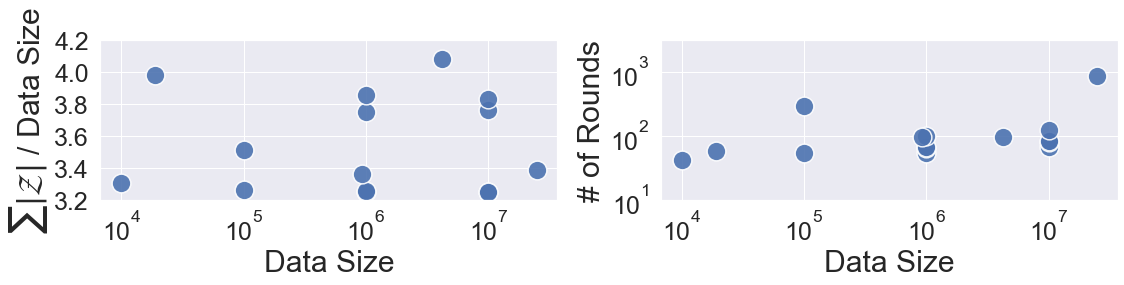

In [15]:
sns.set(font_scale=1.6)
fig, axs = plt.subplots(1, 2, figsize =(16,4))

fontsize = 30

markersize = 350
df = pd.DataFrame({'datasizes': datasizes, 'terminal_nums': terminal_nums})
sns.scatterplot(x = "datasizes", y="terminal_nums", data = df,  s = markersize, ax = axs[0], alpha = 0.9)

axs[0].set_xlabel("Data Size", fontsize = fontsize)
# axs[0].set_ylabel("")
# axs[0].set_ylabel("Total # of Terminal Node / Data Size", fontsize = fontsize)
axs[0].set_ylabel("$\sum |\mathcal{Z}|$ / Data Size", fontsize = fontsize)

myax = axs[0]
myax.set_ylim((3.2,4.2))
yticks = np.arange(3.2,4.3, 0.2)
myax.set_yticks(yticks)
myax.set_yticklabels(("{0:0.1f}".format(i)) for i in yticks)

df = pd.DataFrame({'datasizes': datasizes, 'round_nums': round_nums})
sns.scatterplot(x = "datasizes", y="round_nums", data = df, s = markersize, ax = axs[1], alpha = 0.9)

axs[1].set_xlabel("Data Size", fontsize = fontsize)
# axs[1].set_ylabel("")
axs[1].set_ylabel("# of Rounds", fontsize = fontsize)

myax = axs[1]
ylims = myax.get_ylim()
# myax.set_ylim((ylims[0], ylims[1]))
ytoplog = 3.5
ybottomlog = 1
myax.set_ylim((np.power(10, ybottomlog), np.power(10, ytoplog)))
yticks = np.arange(ybottomlog, ytoplog+(ytoplog-ybottomlog)/5, (ytoplog-ybottomlog)/5)
myax.set_yticks(np.power(10, yticks))
#         myax.set_yticklabels(["{0:0.2f}".format(i) for i in np.power(10, yticks)])
myax.set_yticklabels(["$10^{%s}$" % ("{0:+0.1f}".format(i)) for i in yticks])
# myax.set_yticks(yticks )
# myax.set_yticklabels(yticks )
# for lh in g.legend().legendHandles: 
# #     lh.set_alpha(1)
#     lh._sizes = [100] 
axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
# # 

for ax in axs:
    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(25)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(25)

axs[0].grid(b=True, which='major', linestyle='-')
axs[1].grid(b=True, which='major', linestyle='-')


# axs[1].legend(bbox_to_anchor=([1, 1]), frameon = False, columnspacing = 0.0, fontsize = 28, markerscale=2, borderaxespad=0.01, handletextpad=0.01, borderpad=0.4, labelspacing=0.1)
fig.tight_layout()
plt.savefig("/Users/sy/Desktop/MIT/HAC/hac_paper/revision/figures/stats.pdf", bbox_inches = 'tight', pad_inches = 0.1)

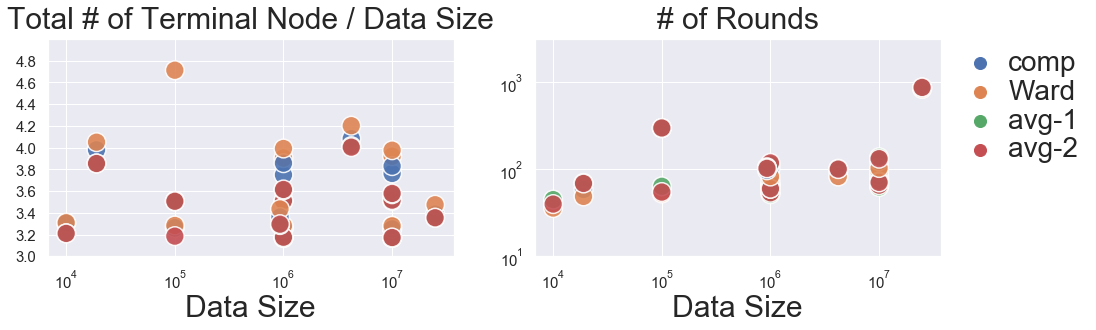

In [233]:
## scatter plots 
datasets = [    "10D_UCI4_100K" ,\
        "10D_UCI1_19K" ,\
        "2D_GaussianDisc_10K",\
        "2D_UniformFill_1M",\
        "2D_GaussianDisc_1M",\
        "5D_UniformFill_1M",\
        "5D_GaussianDisc_1M",\
        "2D_UniformFill_10M",\
        "2D_GaussianDisc_10M",\
        "5D_UniformFill_10M",\
        "5D_GaussianDisc_10M",\
        "3D_GeoLife_24M",\
        "HT",\
        "CHEM", \
        "2D_GaussianDisc_100K"]
sizes = [100000, 
         19020, 
         10000, 
         1000000, 
         1000000, 
         1000000, 
         1000000, 
         10000000, 
         10000000,
         10000000,
         10000000,
         24876978,
         928991,
         4208261,
         100000]
methods = ["comp", "Ward", "avg-1", "avg-2"]
method_folders = ["complete", "ward", "avg32", "avgsq"]

round_nums = []
terminal_nums = []
datasizes = []
colors = []
for i in range(len(datasets)):
    dataset = datasets[i]
    size = sizes[i]
    for i in range(len(methods)):
        method_folder = method_folders[i]
        method = methods[i]
        try:
            round_num, terminal_num = get_round_numbers("/Users/sy/Desktop/MIT/OPTICS/pbbs/linkage/outputs_%s/%s_%s_96th.txt" % (method_folder, method_folder, dataset))    
            round_nums.append(round_num)
            terminal_nums.append(terminal_num/size)
            datasizes.append(size)
            colors.append(method)
        except:
            print(dataset, method)
sns.set(font_scale=1.6)
fig, axs = plt.subplots(1, 2, figsize =(16,4))

fontsize = 30

markersize = 350
df = pd.DataFrame({'datasizes': datasizes, 'terminal_nums': terminal_nums, "method":colors})
sns.scatterplot(x = "datasizes", y="terminal_nums", data = df, hue = colors, s = markersize, ax = axs[0], alpha = 0.9)

axs[0].set_xlabel("Data Size", fontsize = fontsize)
axs[0].set_ylabel("")
axs[0].set_title("Total # of Terminal Node / Data Size", fontsize = fontsize, y=1.02)
myax = axs[0]
myax.set_ylim((3.0,5))
yticks = np.arange(3.0,5, 0.2)
myax.set_yticks(yticks)
myax.set_yticklabels(("{0:0.1f}".format(i)) for i in yticks)

df = pd.DataFrame({'datasizes': datasizes, 'round_nums': round_nums})
sns.scatterplot(x = "datasizes", y="round_nums", data = df, hue = colors, s = markersize, ax = axs[1], alpha = 0.9)

axs[1].set_xlabel("Data Size", fontsize = fontsize)
axs[1].set_ylabel("")
axs[1].set_title("# of Rounds", fontsize = fontsize, y=1.02)

myax = axs[1]
ylims = myax.get_ylim()
# myax.set_ylim((ylims[0], ylims[1]))
ytoplog = 3.5
ybottomlog = 1
myax.set_ylim((np.power(10, ybottomlog), np.power(10, ytoplog)))
yticks = np.arange(ybottomlog, ytoplog+(ytoplog-ybottomlog)/5, (ytoplog-ybottomlog)/5)
myax.set_yticks(np.power(10, yticks))
#         myax.set_yticklabels(["{0:0.2f}".format(i) for i in np.power(10, yticks)])
myax.set_yticklabels(["$10^{%s}$" % ("{0:+0.1f}".format(i)) for i in yticks])
# myax.set_yticks(yticks )
# myax.set_yticklabels(yticks )
# for lh in g.legend().legendHandles: 
#     lh.set_alpha(1)
#     lh._sizes = [100] 
axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
# # 

for ax in axs:
    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(15)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(15)

axs[0].grid(b=True, which='major', linestyle='-')
axs[1].grid(b=True, which='major', linestyle='-')



axs[1].legend(bbox_to_anchor=([1, 1]), frameon = False, columnspacing = 0.0, fontsize = 28, markerscale=2, borderaxespad=0.01, handletextpad=0.01, borderpad=0.4, labelspacing=0.1)
# fig.tight_layout()


In [146]:
df = pd.DataFrame({'datasizes': datasizes, 'terminal_nums': terminal_nums, "method":colors})


In [147]:
df

,datasizes,terminal_nums,method
0,100000,3.511550,comp
1,100000,4.712820,Ward
2,100000,3.507590,avg-1
3,100000,3.507530,avg-2
4,19020,3.981125,comp
5,19020,4.050841,Ward
6,19020,3.855783,avg-1
7,19020,3.854784,avg-2
8,10000,3.305200,comp
9,10000,3.310400,Ward
